
Datenverteilung: {'1': 201688, '2': 151058, '3': 254295, '4': 585616, '5': 1807343}
    --> Max 150'000 pro Klasse um Ungleichgewicht zu verhindern

In [9]:
#In order to test with a subset. Don't execute for real run
import pandas as pd

data = pd.read_csv("data/Books_rating.csv", sep=",")
counts = {"1": 0, "2": 0, "3": 0, "4": 0, "5": 0}
for index, row in data.iterrows():
    # Filter non-helpful reviews
    helpfulness = str(row["review/helpfulness"]).split("/")
    if helpfulness[1] != "0" and (int(helpfulness[0]) / int(helpfulness[1])) < 0.5:
        continue
    reviewScore = '{0:g}'.format(row["review/score"])
    counts[reviewScore] = counts[reviewScore] + 1
print(counts)

{'1': 101301, '2': 94729, '3': 186622, '4': 509393, '5': 1620150}


In [5]:
from pathlib import Path
import pandas as pd

Path("D:/nlp/1").mkdir(parents=True, exist_ok=True)
Path("D:/nlp/2").mkdir(parents=True, exist_ok=True)
Path("D:/nlp/3").mkdir(parents=True, exist_ok=True)
Path("D:/nlp/4").mkdir(parents=True, exist_ok=True)
Path("D:/nlp/5").mkdir(parents=True, exist_ok=True)

counts = {"1": 0, "2": 0, "3": 0, "4": 0, "5": 0}

data = pd.read_csv("data/Books_rating.csv", sep=",")
for index, row in data.iterrows():
    # Filter non-helpful reviews
    helpfulness = str(row["review/helpfulness"]).split("/")
    if helpfulness[1] != "0" and (int(helpfulness[0]) / int(helpfulness[1])) < 0.5:
        continue
    reviewScore = '{0:g}'.format(row["review/score"])
    # Skip after max count per review score has been reached
    counts[reviewScore] = counts[reviewScore] + 1
    if (counts[reviewScore] > 90000):
        continue
    fp = open("D:/nlp/" + reviewScore + "/" + str(index) + ".txt", "w")
    fp.write(row["review/text"])
    fp.close()

KeyboardInterrupt: 

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\pasca\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pasca\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pasca\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Confusion matrix, without normalization
[[1439  203  121]
 [ 367 1014  446]
 [ 184  374 1252]]
Normalized confusion matrix
[[0.81622235 0.11514464 0.06863301]
 [0.20087575 0.55500821 0.24411604]
 [0.10165746 0.20662983 0.69171271]]


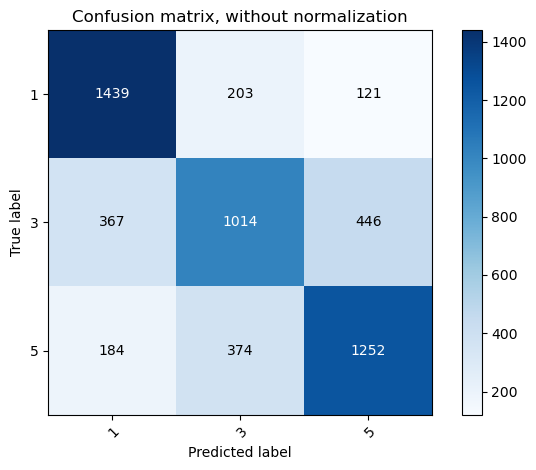

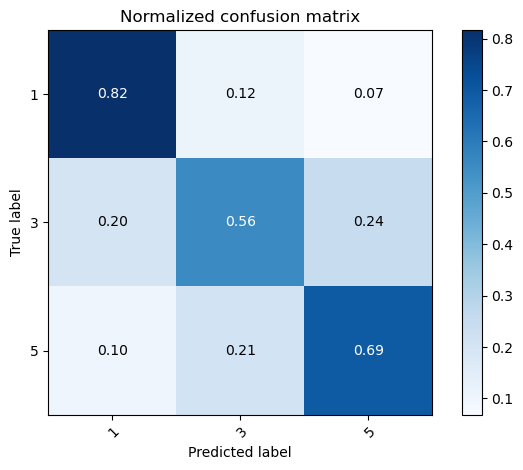

In [7]:
from sklearn.ensemble import RandomForestClassifier
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import re
import nltk
from sklearn.datasets import load_files

import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils.multiclass import unique_labels

# Methode ist keine Eigenleistung. Quelle: https://stackoverflow.com/questions/58766561/scikit-learn-sklearn-confusion-matrix-plot-for-more-than-3-classes
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.xlim(-0.5, len(np.unique(y))-0.5)
    plt.ylim(len(np.unique(y))-0.5, -0.5)
    return ax

nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords

data = load_files(r"D:/nlp")
X, y = data.data, data.target

documents = []

stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))

    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)

    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)

    # Converting to Lowercase
    document = document.lower()

    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)

    documents.append(document)

tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = tfidfconverter.fit_transform(documents).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# classifier = GaussianNB()
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


class_names = np.array(['1', '2', '3', '4', '5'])

plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()